In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import AdaBoostClassifier

## Import Dataset

In [2]:
df_pen = sns.load_dataset('penguins')

In [3]:
df_pen = df_pen.dropna()

In [4]:
df_pen = df_pen.sample(frac=1).reset_index(drop=True)

In [5]:
X = df_pen.drop(['species'], axis = 1)
y = df_pen['species']

## Data Pre-processing

In [6]:
X = pd.get_dummies(X, drop_first=True)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state=101)

In [8]:
escalador = StandardScaler()
escalador.fit(X_train)

X_train = escalador.transform(X_train)
X_test = escalador.transform(X_test)

## Model implementation

In [9]:
model = AdaBoostClassifier()

In [10]:
model.fit(X_train,y_train)

AdaBoostClassifier()

In [11]:
base_pred = model.predict(X_test)

## Evaluation

In [12]:
y_pred = model.predict(X_test)

In [13]:
metrics.accuracy_score(y_test,y_pred)

0.84

In [14]:
metrics.confusion_matrix(y_test,y_pred)

array([[24,  1,  1],
       [ 6,  0,  0],
       [ 0,  0, 18]], dtype=int64)

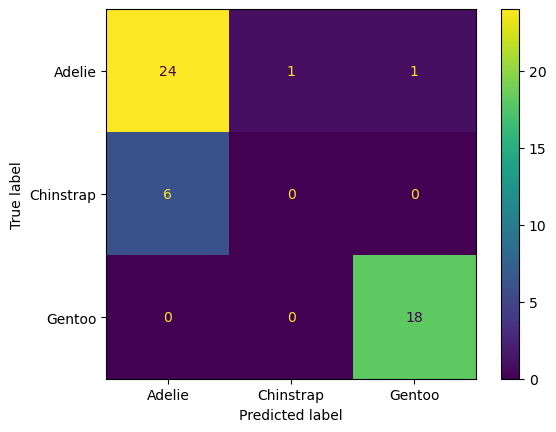

In [15]:
cm = metrics.confusion_matrix(y_test,y_pred)
metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=model.classes_).plot()

In [16]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      Adelie       0.80      0.92      0.86        26
   Chinstrap       0.00      0.00      0.00         6
      Gentoo       0.95      1.00      0.97        18

    accuracy                           0.84        50
   macro avg       0.58      0.64      0.61        50
weighted avg       0.76      0.84      0.80        50



In [17]:
model.feature_importances_

array([0.  , 0.5 , 0.48, 0.02, 0.  , 0.  , 0.  ])

In [18]:
df_feature_importance = pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['Feature Importance'])
df_feature_importance = df_feature_importance.sort_values('Feature Importance', ascending = False)
df_feature_importance

,Feature Importance
bill_depth_mm,0.50
flipper_length_mm,0.48
body_mass_g,0.02
bill_length_mm,0.00
island_Dream,0.00
island_Torgersen,0.00
sex_Male,0.00


## Grid Search

In [19]:
model = AdaBoostClassifier()

In [20]:
n_estimators = [15,20,25,30,35]
learning_rate = [1]

parametros = {'n_estimators':n_estimators,
              'learning_rate':learning_rate,}

In [21]:
grid_model = GridSearchCV(model,param_grid= parametros, cv = 5, scoring='accuracy', n_jobs=-1)

In [22]:
grid_model.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [1],
                         'n_estimators': [15, 20, 25, 30, 35]},
             scoring='accuracy')

In [23]:
grid_model.best_params_

{'learning_rate': 1, 'n_estimators': 15}

In [24]:
y_pred = grid_model.predict(X_test)

### Evaluation

In [25]:
metrics.accuracy_score(y_test,y_pred)

0.84

In [26]:
metrics.confusion_matrix(y_test,y_pred)

array([[24,  1,  1],
       [ 6,  0,  0],
       [ 0,  0, 18]], dtype=int64)

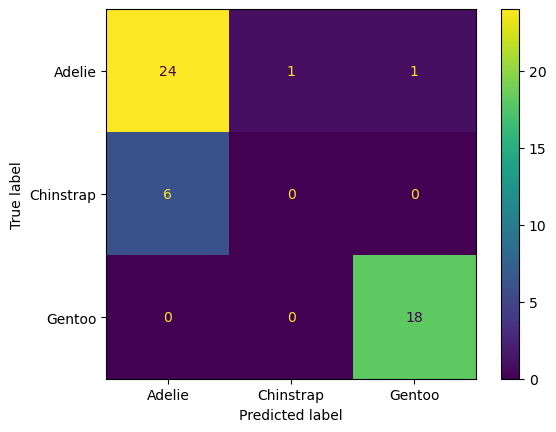

In [27]:
cm = metrics.confusion_matrix(y_test,y_pred)
metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=grid_model.classes_).plot()

In [28]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      Adelie       0.80      0.92      0.86        26
   Chinstrap       0.00      0.00      0.00         6
      Gentoo       0.95      1.00      0.97        18

    accuracy                           0.84        50
   macro avg       0.58      0.64      0.61        50
weighted avg       0.76      0.84      0.80        50



In [29]:
grid_model.best_estimator_.feature_importances_

array([0.        , 0.46666667, 0.46666667, 0.06666667, 0.        ,
       0.        , 0.        ])

In [30]:
df_feature_importance = pd.DataFrame(index=X.columns,data=grid_model.best_estimator_.feature_importances_,columns=['Feature Importance'])
df_feature_importance = df_feature_importance.sort_values('Feature Importance', ascending = False)
df_feature_importance

,Feature Importance
bill_depth_mm,0.466667
flipper_length_mm,0.466667
body_mass_g,0.066667
bill_length_mm,0.000000
island_Dream,0.000000
island_Torgersen,0.000000
sex_Male,0.000000


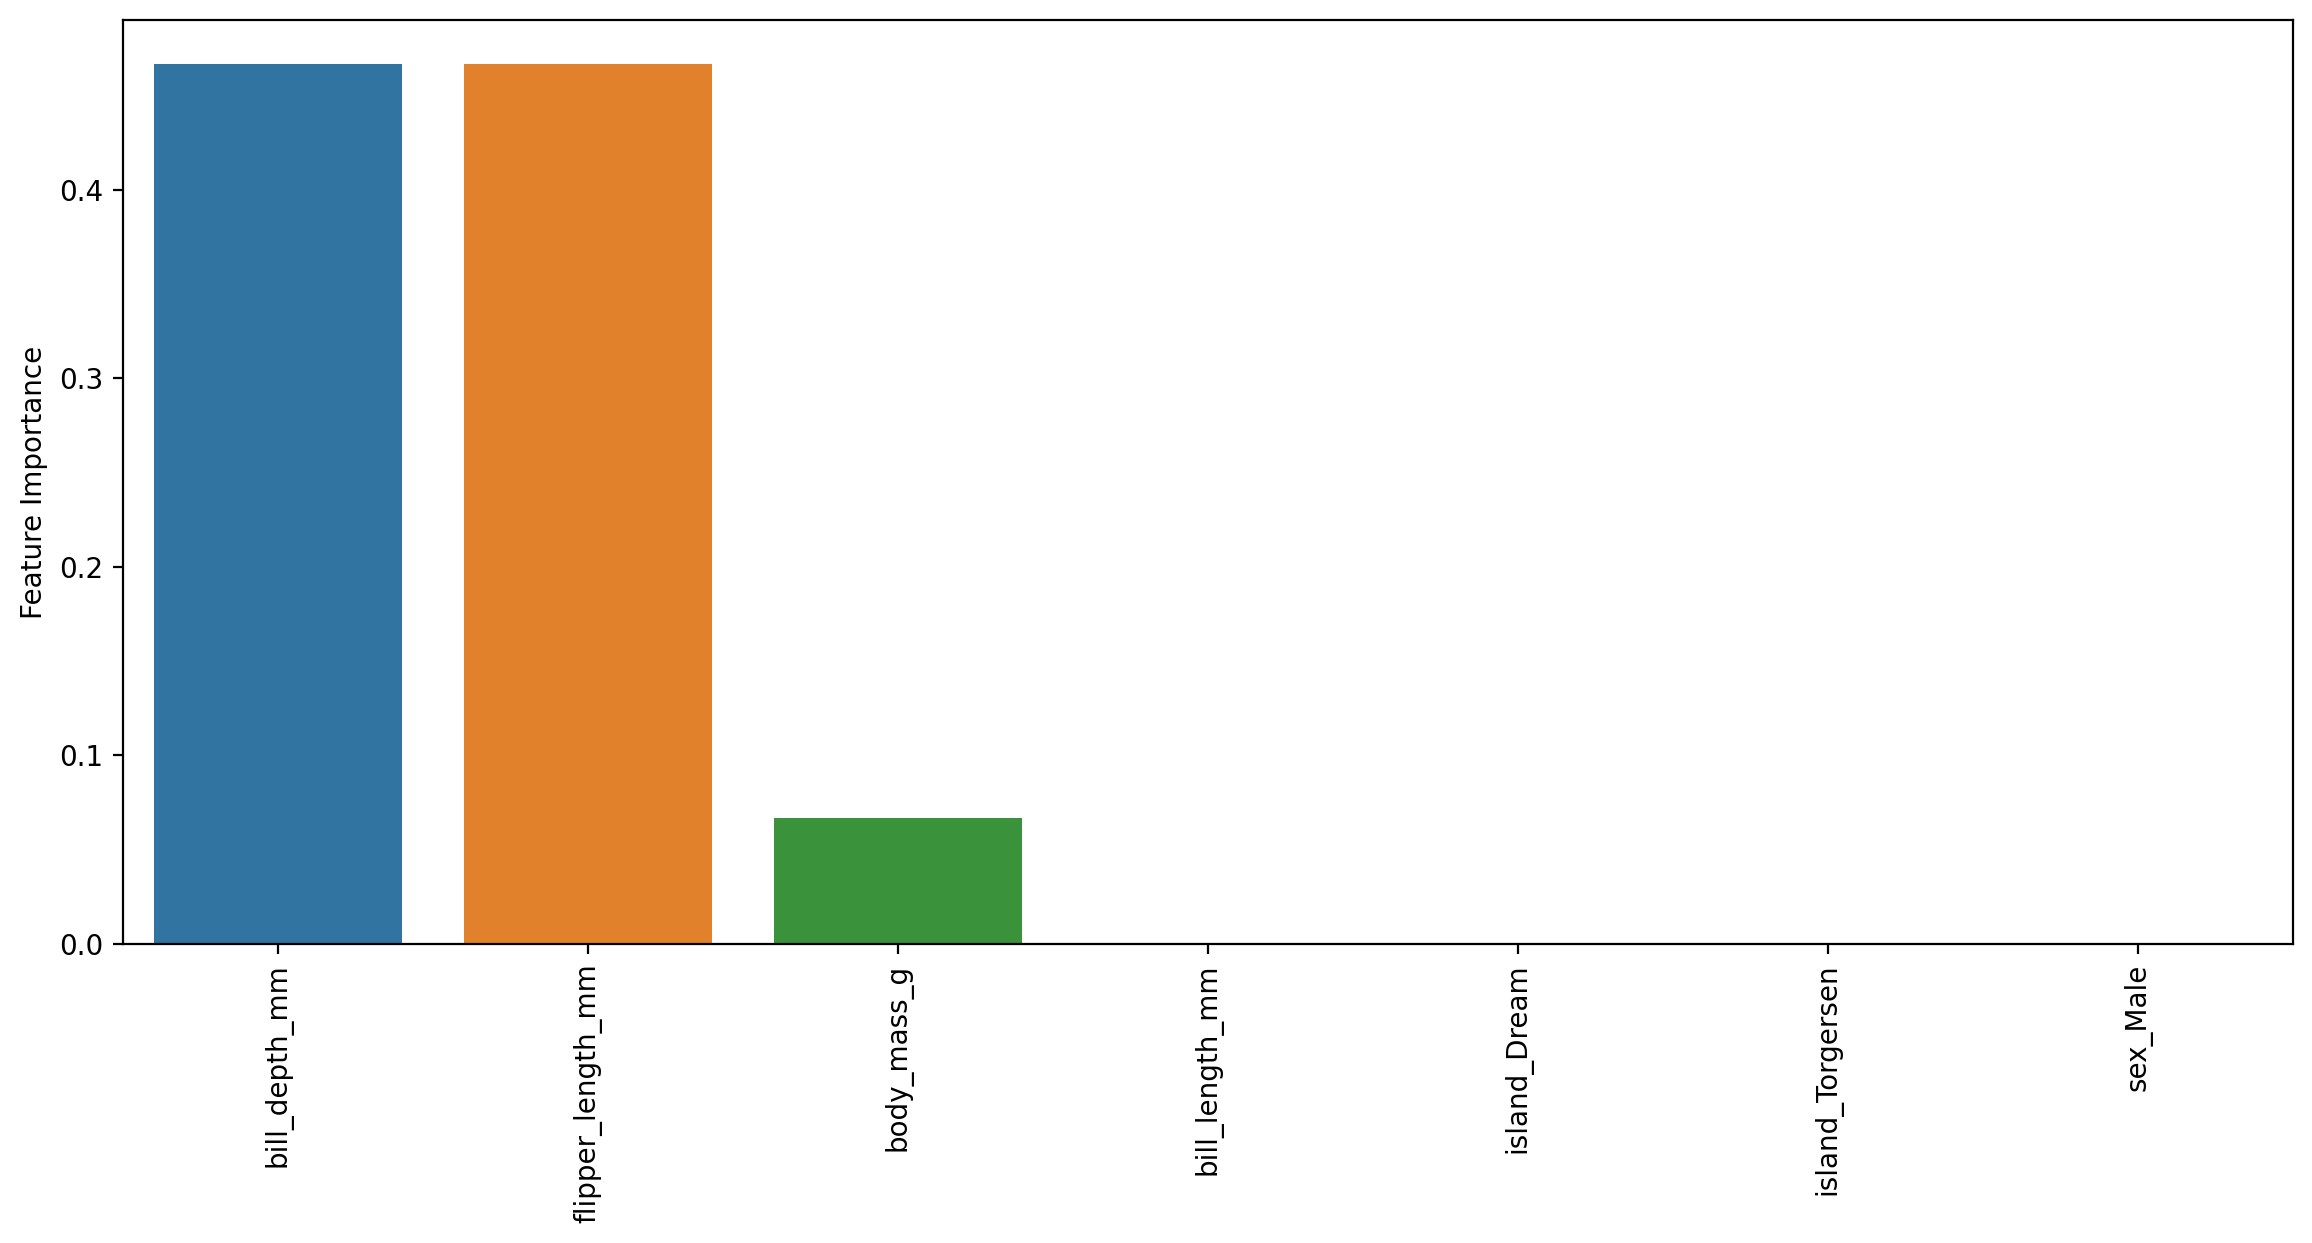

In [31]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data = df_feature_importance,x=df_feature_importance.index,y='Feature Importance')

plt.xticks(rotation=90);

## Elbow

In [32]:
errors = []
misclassifications = []

for n in range(1,64):
    rfc = AdaBoostClassifier( n_estimators=n,)
    rfc.fit(X_train,y_train)
    preds = rfc.predict(X_test)
    err = 1 - metrics.accuracy_score(preds,y_test)
    n_missed = np.sum(preds != y_test) # watch the video to understand this line!!
    errors.append(err)
    misclassifications.append(n_missed)

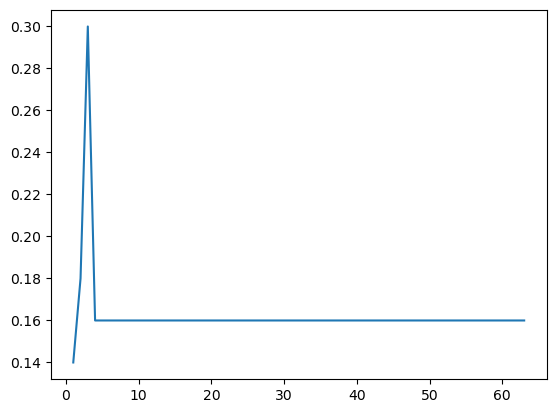

In [33]:
plt.plot(range(1,64),errors)

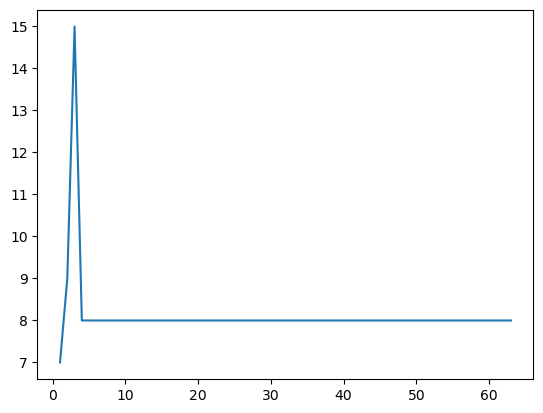

In [34]:
plt.plot(range(1,64),misclassifications)